In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

# 활성화 함수

In [2]:
import numpy as np
np.e

2.718281828459045

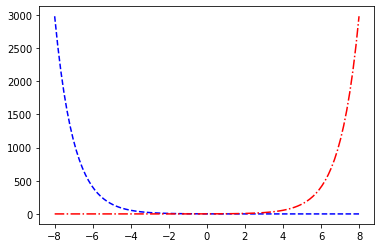

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
x = np.linspace(-8, 8, 100)
plt.plot(x, np.exp(-x), 'b--')
_ = plt.plot(x, np.exp(x), 'r-.')

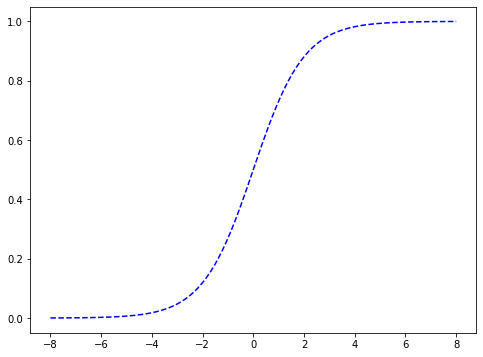

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def sigm_func(x): # sigmoid 함수
    return 1 / (1 + np.exp(-x))

# 시그모이드 함수 그리기
plt.figure(figsize=(8, 6))
x = np.linspace(-8, 8, 100)
plt.plot(x, sigm_func(x), 'b--')

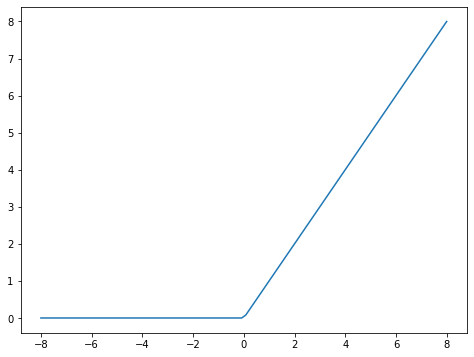

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def relu_func(x): # ReLU(Rectified Linear Unit, 정류된 선형 유닛) 함수
    return np.maximum(0, x)
    #return (x>0)*x # same

#  ReLU 함수 그리기
plt.figure(figsize=(8, 6))
x = np.linspace(-8, 8, 100)
plt.plot(x, relu_func(x))

# AND 게이트 구현

In [16]:
import numpy as np
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1], [0], [0], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(x, y, epochs=400, batch_size=1)

Epoch 1/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2984
Epoch 2/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2566
Epoch 3/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2264
Epoch 4/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2037
Epoch 5/400
4/4 [==============================] - 0s 3ms/step - loss: 0.1887
Epoch 6/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1770
Epoch 7/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1687
Epoch 8/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1606
Epoch 9/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1557
Epoch 10/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1509
Epoch 11/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1475
Epoch 12/400
4/4 [==============================] - 0s 2ms/step - loss: 0.1442
Epoch 13/400
4/4 [==============================] - 0s 2ms/st

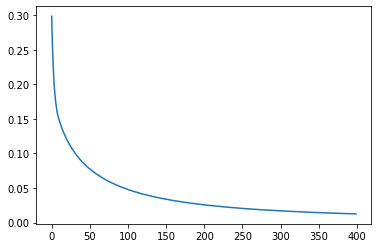

In [20]:
# 3.34 2-레이어 XOR 네트워크의 loss 변화를 선 그래프로 표시
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [21]:
model.predict(x)

array([[0.85769135],
       [0.11937571],
       [0.1193485 ],
       [0.00303894]], dtype=float32)

In [22]:
for weight in model.weights:
      print(weight)

<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[3.7948601],
       [3.7946012]], dtype=float32)>
<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-5.7932153], dtype=float32)>


In [23]:
model.weights[0]

<tf.Variable 'dense_2/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[3.7948601],
       [3.7946012]], dtype=float32)>

In [24]:
model.weights[1]

<tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([-5.7932153], dtype=float32)>

# 케라스로 OR 구현하기

In [26]:
# tf.keras 를 이용한 OR 네트워크 계산
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.summary()

history = model.fit(x, y, epochs=400, batch_size=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
4/4 [==============================] - 0s 2ms/step - loss: 0.5075
Epoch 2/400
4/4 [==============================] - 0s 2ms/step - loss: 0.4514
Epoch 3/400
4/4 [==============================] - 0s 1ms/step - loss: 0.3858
Epoch 4/400
4/4 [==============================] - 0s 1ms/step - loss: 0.3219
Epoch 5/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2689
Epoch 6/400
4/4 [==============================] - 0s 1ms/step - loss: 0.2341
Epoch 7/400
4/4 [==============================] - 0s 2ms/step - loss: 0.2126
Epoch 8/400
4/4 [==============================] - 0s 1ms/step - loss: 0.1980
Epoch 9/400
4/4 [=============

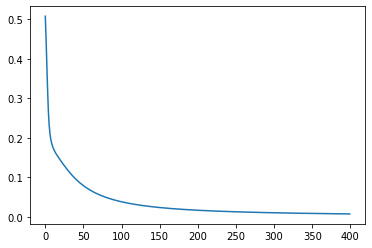

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [28]:
model.predict(x)

array([[0.99899626],
       [0.92282283],
       [0.9229711 ],
       [0.1258378 ]], dtype=float32)

In [29]:
for weight in model.weights:
    print(weight)

<tf.Variable 'dense_3/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[4.419605 ],
       [4.4216895]], dtype=float32)>
<tf.Variable 'dense_3/bias:0' shape=(1,) dtype=float32, numpy=array([-1.9382716], dtype=float32)>


# XOR 구현

In [31]:
# 3.27 tf.keras 를 이용한 XOR 네트워크 계산
import tensorflow as tf
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.3), loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 3.28 tf.keras 를 이용한 XOR 네트워크 학습
history = model.fit(x, y, epochs=1500, batch_size=1)

Epoch 1/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 2/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 3/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 4/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 5/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 6/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 7/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 8/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 9/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 10/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 11/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 12/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 13/1500
4/4 [==============================

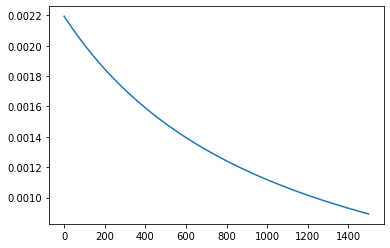

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [35]:
# 3.29 tf.keras 를 이용한 XOR 네트워크 평가
print(model.predict(x))

[[0.02657896]
 [0.97205484]
 [0.9657399 ]
 [0.03005928]]


In [36]:
# 3.30 XOR 네트워크의 가중치와 편향 확인
for weight in model.weights:
    print(weight)

<tf.Variable 'dense_6/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 5.604852 ,  5.6521564],
       [-5.704206 , -5.437724 ]], dtype=float32)>
<tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32, numpy=array([-3.0762389,  2.7252443], dtype=float32)>
<tf.Variable 'dense_7/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 8.532437],
       [-8.202974]], dtype=float32)>
<tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([3.8481631], dtype=float32)>


In [37]:
model.weights[0]

<tf.Variable 'dense_6/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 5.604852 ,  5.6521564],
       [-5.704206 , -5.437724 ]], dtype=float32)>

In [38]:
model.weights[1]

<tf.Variable 'dense_6/bias:0' shape=(2,) dtype=float32, numpy=array([-3.0762389,  2.7252443], dtype=float32)>

In [39]:
model.weights[2]

<tf.Variable 'dense_7/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[ 8.532437],
       [-8.202974]], dtype=float32)>

In [40]:
model.weights[3]

<tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([3.8481631], dtype=float32)>